In [2]:
!pip install textblob
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# loading dataset
df = pd.read_csv('/content/Restaurant_Reviews.csv')
df

,Review,Rating,Metadata,Time,Pictures
0,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...
9945,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9946,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9947,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9948,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [ ]:
# dataset
df.head()

,Review,Rating,Metadata,Time,Pictures
0,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# Describing dataset
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)

Dataset Shape: (9950, 5)
Dataset Columns: Index(['Review', 'Rating', 'Metadata', 'Time', 'Pictures'], dtype='object')


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Review      0
Rating      0
Metadata    0
Time        0
Pictures    0
dtype: int64


In [ ]:
# Summary of Dataset
print("Dataset Statistical Summary:\n")
print(df.describe())

Dataset Statistical Summary:

            Rating     Pictures
count  9950.000000  9950.000000
mean      3.600402     0.752261
std       1.483558     2.576292
min       1.000000     0.000000
25%       3.000000     0.000000
50%       4.000000     0.000000
75%       5.000000     0.000000
max       5.000000    64.000000


In [ ]:
# Checking Unique Values in Key Columns
print("\nUnique Ratings:", df['Rating'].unique())
print("Number of Unique Reviews:", df['Review'].nunique())
print("Number of Unique Metadata Entries:", df['Metadata'].nunique())


Unique Ratings: [5.  4.  1.  3.  2.  3.5 4.5 2.5 1.5]
Number of Unique Reviews: 9360
Number of Unique Metadata Entries: 2477


In [ ]:
# Analyzing review lengths
df['Review_Length'] = df['Review'].astype(str).apply(len)
print("\nReview Length Statistics:\n")
print(df['Review_Length'].describe())



Review Length Statistics:

count    9950.000000
mean      279.890050
std       338.637542
min         1.000000
25%       144.000000
50%       189.000000
75%       321.000000
max      5212.000000
Name: Review_Length, dtype: float64


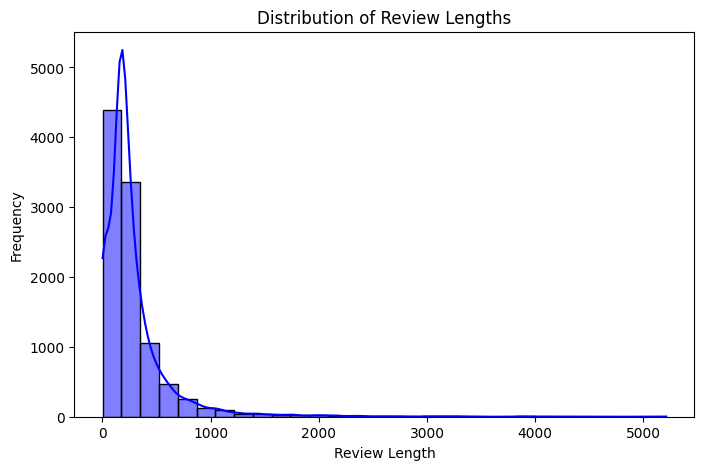

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Review_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<ipython-input-19-337d7cae3d5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


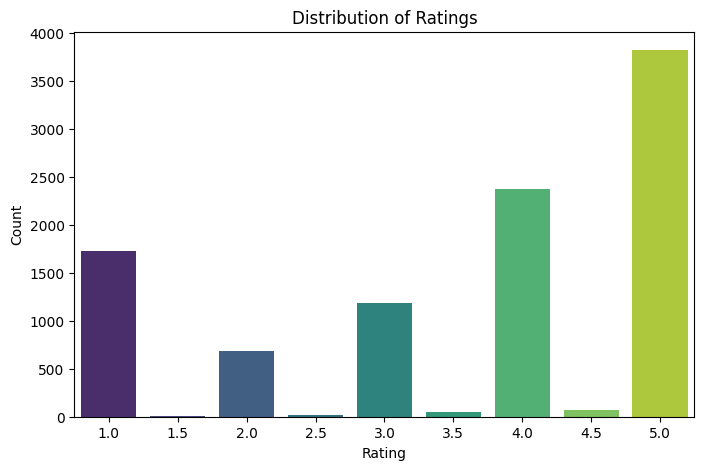

In [ ]:
# Plotting the distribution of Ratings
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-20-ba86f81a3574>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


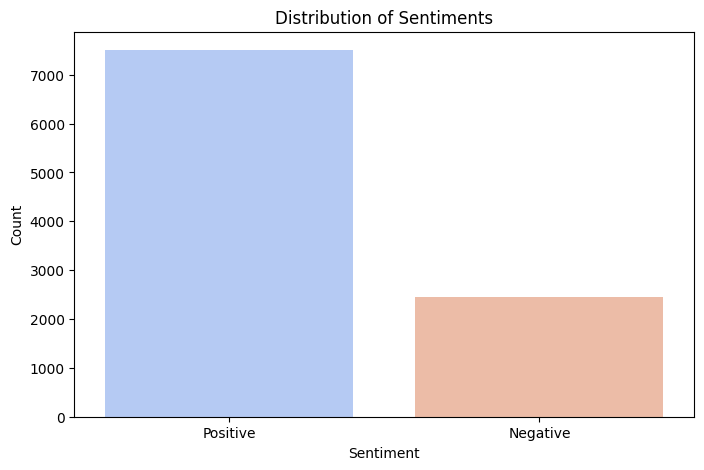

In [ ]:
# Categorizing Sentiments
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 3 else 'Negative')

# Plotting distribution of sentiments
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Understanding Data Columns


In [ ]:
print("Original Columns:\n", df.columns)

Original Columns:
 Index(['Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Review_Length',
       'Sentiment'],
      dtype='object')


In [ ]:
# Dropping Columns that are not needed
columns_to_drop = ['Metadata', 'Time', 'Pictures']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Verifying the shape of the data after dropping columns
print("Updated Columns:\n", df.columns)
print("\nShape of the Dataset After Dropping Columns:", df.shape)

Updated Columns:
 Index(['Review', 'Rating', 'Review_Length', 'Sentiment'], dtype='object')

Shape of the Dataset After Dropping Columns: (9950, 4)


In [ ]:
# Checking for missing values after dropping columns
missing_values_after_removal = df.isnull().sum()

Data Preprocessing

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
def preprocess_text(text):
    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Tokenizing the text
    tokens = word_tokenize(text)

    # Removing numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # Eliminating special characters and punctuation - also extra spaces
    tokens = [re.sub(r'\W', '', word) for word in tokens]
    tokens = [word for word in tokens if word]

    # Converting text to lowercase
    tokens = [word.lower() for word in tokens]

    # Applying lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joinning the words back into a text string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

Sentiment Analysis

Using TextBlob

In [ ]:

from textblob import TextBlob
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def analyze_sentiment_textblob(review):
    polarity = TextBlob(review).sentiment.polarity
    return 'Positive' if polarity > 0 else 'Negative'

df['TextBlob_Sentiment'] = df['Review'].apply(analyze_sentiment_textblob)

textblob_conf_matrix = confusion_matrix(df['Sentiment'], df['TextBlob_Sentiment'])
textblob_class_report = classification_report(df['Sentiment'], df['TextBlob_Sentiment'])
textblob_accuracy = accuracy_score(df['Sentiment'], df['TextBlob_Sentiment'])

print("Confusion Matrix of TextBlob:\n", textblob_conf_matrix)
print("\nClassification Report of TextBlob:\n", textblob_class_report)
print("\nAccuracy TextBlob:", textblob_accuracy)

Confusion Matrix of TextBlob:
 [[1762  684]
 [ 692 6812]]

Classification Report of TextBlob:
               precision    recall  f1-score   support

    Negative       0.72      0.72      0.72      2446
    Positive       0.91      0.91      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.81      0.81      0.81      9950
weighted avg       0.86      0.86      0.86      9950


Accuracy TextBlob: 0.8617085427135679


In [ ]:
# Using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(review):
    score = vader_analyzer.polarity_scores(review)
    return 'Positive' if score['compound'] > 0 else 'Negative'

df['VADER_Sentiment'] = df['Review'].apply(analyze_sentiment_vader)

vader_conf_matrix = confusion_matrix(df['Sentiment'], df['VADER_Sentiment'])
vader_class_report = classification_report(df['Sentiment'], df['VADER_Sentiment'])
vader_accuracy = accuracy_score(df['Sentiment'], df['VADER_Sentiment'])

print("Confusion Matrix (VADER):\n", vader_conf_matrix)
print("\nClassification Report (VADER):\n", vader_class_report)
print("\nAccuracy (VADER):", vader_accuracy)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Confusion Matrix (VADER):
 [[1832  614]
 [ 710 6794]]

Classification Report (VADER):
               precision    recall  f1-score   support

    Negative       0.72      0.75      0.73      2446
    Positive       0.92      0.91      0.91      7504

    accuracy                           0.87      9950
   macro avg       0.82      0.83      0.82      9950
weighted avg       0.87      0.87      0.87      9950


Accuracy (VADER): 0.8669346733668342


Analysis by class work

In [ ]:
# Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import  PorterStemmer
ps = PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(df)):
  cleaned_review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
  cleaned_review = cleaned_review.lower()
  cleaned_review = cleaned_review.split()
  cleaned_review = [ps.stem(word) for word in cleaned_review if not word in stopwords.words('english')]
  cleaned_review = ' '.join(cleaned_review)
  corpus.append(cleaned_review)
print(cleaned_review)

check tri delici chines food seen non veg luncheon tray menu an tri charg tax start manchow soup like instantli thereaft luncheon tray came pepper chicken starter kimchi salad wolli chicken egg fri rice egg hakka noodl tast fine like eat egg hakka noodl egg fri rice time badli miss dessert along tray dnt mind extra price valu money fine ambienc


In [ ]:
corpus

['ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen da realli courteou help',
 'ambienc good pleasant even servic prompt food good good experi soumen da kudo servic',
 'must tri great food great ambienc thnx servic pradeep subroto person recommend penn alfredo pasta also music background amaz',
 'soumen da arun great guy behavior sincereti good food cours would like visit place',
 'food good order kodi drumstick basket mutton biryani good thank pradeep serv well enjoy ambienc also good',
 'ambianc good servic good food apradeecp subro best servic food good papiya good hostess ur caption good star restaur',
 'nice place ambienc differ food order tasti servic also gud worth visit reason well realli must visit place',
 'well read mani review final visit place ambienc good come food crispi corn nice tawa fish ok basket biryani disappoint us biryani ok flatter claim staff polit prompt especi pradeep suman',
 'excel food 

In [ ]:
# n grams
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer()
X=cv.fit_transform(corpus)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=pd.get_dummies(df['Rating'])
y=y.iloc[:,1].values

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [ ]:
# Prediction
y_pred = spam_detect_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score = accuracy_score(y_test,y_pred)
score

0.9984924623115577

In [ ]:
classification = classification_report(y_pred,y_test)
print(classification)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1989
        True       0.00      0.00      0.00         1

    accuracy                           1.00      1990
   macro avg       0.50      0.50      0.50      1990
weighted avg       1.00      1.00      1.00      1990



In [ ]:
df

,Review,Rating,Review_Length,Sentiment,TextBlob_Sentiment,VADER_Sentiment
0,"The ambience was good, food was quite good . h...",5.0,222,Positive,Positive,Positive
1,Ambience is too good for a pleasant evening. S...,5.0,144,Positive,Positive,Positive
2,A must try.. great food great ambience. Thnx f...,5.0,189,Positive,Positive,Positive
3,Soumen das and Arun was a great guy. Only beca...,5.0,148,Positive,Positive,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,160,Positive,Positive,Positive
...,...,...,...,...,...,...
9945,Madhumathi Mahajan Well to start with nice cou...,3.0,1024,Positive,Positive,Positive
9946,This place has never disappointed us.. The foo...,4.5,320,Positive,Positive,Positive
9947,"Bad rating is mainly because of ""Chicken Bone ...",1.5,1555,Negative,Positive,Positive
9948,I personally love and prefer Chinese Food. Had...,4.0,511,Positive,Positive,Positive


In [ ]:


# Save to CSV
df.to_csv('output.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!
